In [1]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_pwr, load_oper
from pathlib import Path
from our_values import *
from our_functions import ideal_curve, compute_overshoot_settling,load_ctrl_tuning,compute_ctrl_tuning, fit_curve_KK
import pandas as pd
from lacbox.io import load_ctrl_txt
from scipy.optimize import curve_fit
from lacbox.io import ReadHAWC2
from lacbox.test import test_data_path

plt.rcParams.update({'font.family': 'serif', 'font.size':16})
from matplotlib.ticker import FormatStrFormatter




In [2]:
# hawc2s values

redesign_ctrl_tuning_path = 'remodel/res_hawc2s/remodel_hawc2s_ctrltune_ctrl_tuning.txt'
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
th_data = compute_ctrl_tuning(hawc2s_data, fit_redesign)


# comparison
print(f'element     |   theoretical   |      hawc2s     | % difference ')
for key in th_data.keys():
    print(f"{key:12}| {th_data[key]:15.4f} | {hawc2s_data[key]:15.4f} | {(th_data[key] - hawc2s_data[key])/hawc2s_data[key]*100:10.3f}")



element     |   theoretical   |      hawc2s     | % difference 
K_opt       |   10976435.6854 |   10662100.0000 |      2.948
I           |  183374000.0000 |  183374000.0000 |      0.000
Kp_torque   |   80652097.5763 |   80652100.0000 |     -0.000
Ki_torque   |   18098288.3745 |   18098300.0000 |     -0.000
Kp_pitch    |          1.6413 |          1.6413 |      0.005
Ki_pitch    |          0.3968 |          0.3968 |      0.000
KK1         |         13.5701 |         13.5701 |      0.000
KK2         |        381.3049 |        381.3054 |     -0.000
dQ_dtheta_0 |      -1146.3162 |      -1146.3162 |     -0.000


## DTU 10MW

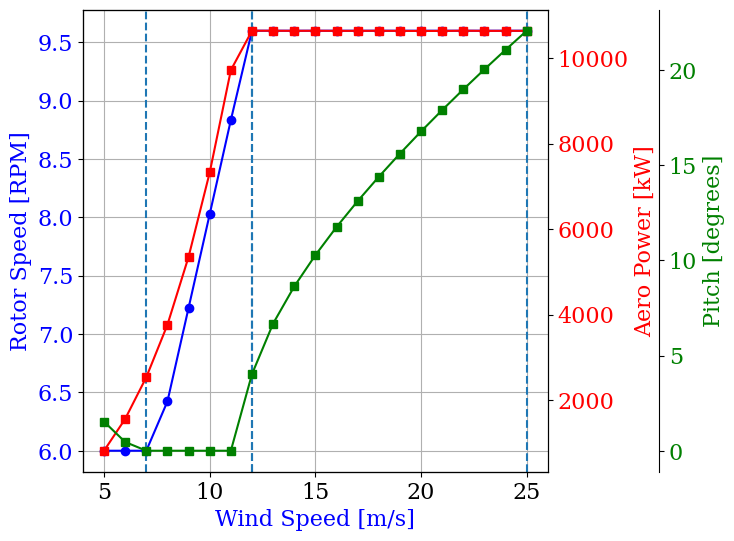

In [3]:
# evaluate regions for dtu 10 MW following lecture 6

dtu_path = 'dtu_10mw/res_hawc2s/dtu_10mw_hawc2s_21wsp_ctrltune.pwr'
dtu_data = load_pwr(dtu_path)
#print(dtu_data.keys())

#regions = [2,3,5,13]        # from lecture, does not make sense
regions = [3,8,8,21]        # from detected regions, in log file

fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot wind speed vs rotor speed
ax1.plot(dtu_data['V_ms'], dtu_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]', color='b')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(dtu_data['V_ms'], dtu_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(dtu_data['V_ms'], dtu_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions:
    ax1.axvline(x=dtu_data['V_ms'][i-1], linestyle='--')

ax1.grid(True)

#plt.savefig('3_1_dtu10mw_control.pdf', format='pdf',bbox_inches='tight')
plt.show()



## REMODEL
run HAWC2S on remodel_hawc2s_ctrltune

C:\Users\nicol\AppData\Local\Temp\ipykernel_2804\2179502480.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b:o" (-> linestyle=':'). The keyword argument will take precedence.
  ax1.plot(redesign_dat2['V_ms'], redesign_dat2['Speed_rpm'],  'b:o', linestyle=':')


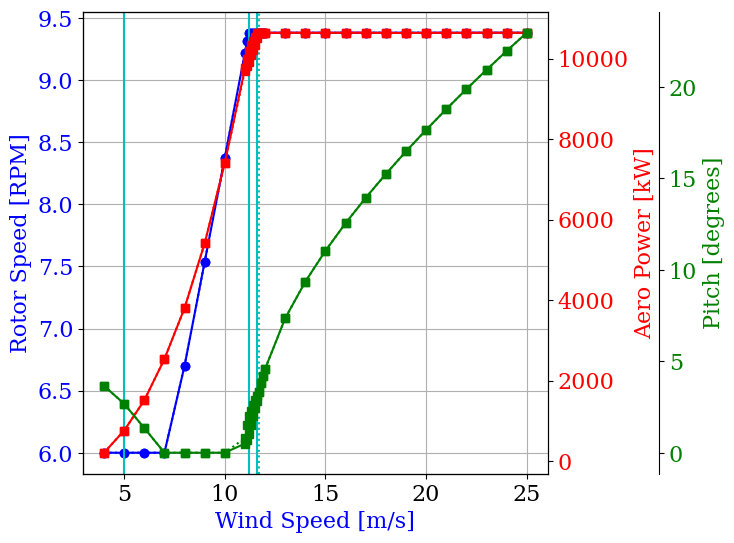

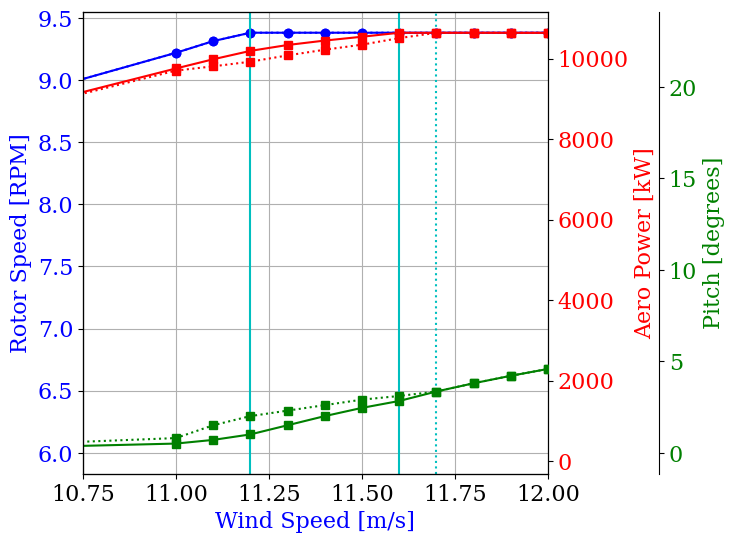

In [4]:
# evaluate regions wit peak shaving

redesign_data = load_pwr('remodel/res_hawc2s/remodel_hawc2s_ctrltune_smallShave.pwr')
redesign_dat2 = load_pwr('remodel/res_hawc2s/remodel_hawc2s_ctrltune_largeShave.pwr')


regions = [1,9,13,31] 

fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot wind speed vs rotor speed
ax1.plot(redesign_data['V_ms'], redesign_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.plot(redesign_dat2['V_ms'], redesign_dat2['Speed_rpm'],  'b:o', linestyle=':')
ax1.set_ylabel('Rotor Speed [RPM]', color='b')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(redesign_data['V_ms'], redesign_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.plot(redesign_dat2['V_ms'], redesign_dat2['P_kW'], 'r:s')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(redesign_data['V_ms'], redesign_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.plot(redesign_dat2['V_ms'], redesign_dat2['Pitch_deg'], 'g:s')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions[:-1]:
    ax1.axvline(x=redesign_data['V_ms'][i], linestyle='-', color = 'c')
ax1.axvline(x=redesign_data['V_ms'][14], linestyle=':', color = 'c')

ax1.grid(True)
plt.savefig('plots/ctr_control.pdf', format='pdf',bbox_inches='tight')
plt.show()


fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot wind speed vs rotor speed
ax1.plot(redesign_data['V_ms'], redesign_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.plot(redesign_dat2['V_ms'], redesign_dat2['Speed_rpm'],  'b:o')
ax1.set_ylabel('Rotor Speed [RPM]', color='b')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(redesign_data['V_ms'], redesign_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.plot(redesign_dat2['V_ms'], redesign_dat2['P_kW'], 'r:s')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(redesign_data['V_ms'], redesign_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.plot(redesign_dat2['V_ms'], redesign_dat2['Pitch_deg'], 'g:s')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions[:-1]:
    ax1.axvline(x=redesign_data['V_ms'][i], linestyle='-', color = 'c')
ax1.axvline(x=redesign_data['V_ms'][14], linestyle=':', color = 'c')


ax1.set_xlim(10.75,12)
ax1.grid(True)
plt.savefig('plots/ctr_control_zoom.pdf', format='pdf',bbox_inches='tight')
plt.show()



In [5]:
# hawc2s values

redesign_ctrl_tuning_path = 'remodel/res_hawc2s/remodel_hawc2s_ctrltune_ctrl_tuning.txt'
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
th_data = compute_ctrl_tuning(hawc2s_data, fit_redesign)

# comparison
print('no peak shaving')
print(f'element     |   theoretical   |      hawc2s     | % difference ')
for key in th_data.keys():
    print(f"{key:12}| {th_data[key]:15.4f} | {hawc2s_data[key]:15.4f} | {(th_data[key] - hawc2s_data[key])/hawc2s_data[key]*100:10.3f}")



redesign_ctrl_tuning_path = 'remodel/res_hawc2s/remodel_hawc2s_ctrltune_smallShave_ctrl_tuning.txt'
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
th_data = compute_ctrl_tuning(hawc2s_data, fit_redesign)

# comparison
print('smallShave')
print(f'element     |   theoretical   |      hawc2s     | % difference ')
for key in th_data.keys():
    print(f"{key:12}| {th_data[key]:15.4f} | {hawc2s_data[key]:15.4f} | {(th_data[key] - hawc2s_data[key])/hawc2s_data[key]*100:10.3f}")


redesign_ctrl_tuning_path = 'remodel/res_hawc2s/remodel_hawc2s_ctrltune_largeShave_ctrl_tuning.txt'
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
th_data = compute_ctrl_tuning(hawc2s_data, fit_redesign)

# comparison
print('largeShave')
print(f'element     |   theoretical   |      hawc2s     | % difference ')
for key in th_data.keys():
    print(f"{key:12}| {th_data[key]:15.4f} | {hawc2s_data[key]:15.4f} | {(th_data[key] - hawc2s_data[key])/hawc2s_data[key]*100:10.3f}")


no peak shaving
element     |   theoretical   |      hawc2s     | % difference 
K_opt       |   10976435.6854 |   10662100.0000 |      2.948
I           |  183374000.0000 |  183374000.0000 |      0.000
Kp_torque   |   80652097.5763 |   80652100.0000 |     -0.000
Ki_torque   |   18098288.3745 |   18098300.0000 |     -0.000
Kp_pitch    |          1.6413 |          1.6413 |      0.005
Ki_pitch    |          0.3968 |          0.3968 |      0.000
KK1         |         13.5701 |         13.5701 |      0.000
KK2         |        381.3049 |        381.3054 |     -0.000
dQ_dtheta_0 |      -1146.3162 |      -1146.3162 |     -0.000
smallShave
element     |   theoretical   |      hawc2s     | % difference 
K_opt       |   10976435.6854 |   10662100.0000 |      2.948
I           |  183374000.0000 |  183374000.0000 |      0.000
Kp_torque   |   80652097.5763 |   80652100.0000 |     -0.000
Ki_torque   |   18098288.3745 |   18098300.0000 |     -0.000
Kp_pitch    |          1.6413 |          1.6413 |   

Fitted K1: 14.077087470847673
Fitted K2: 376.79105192112155


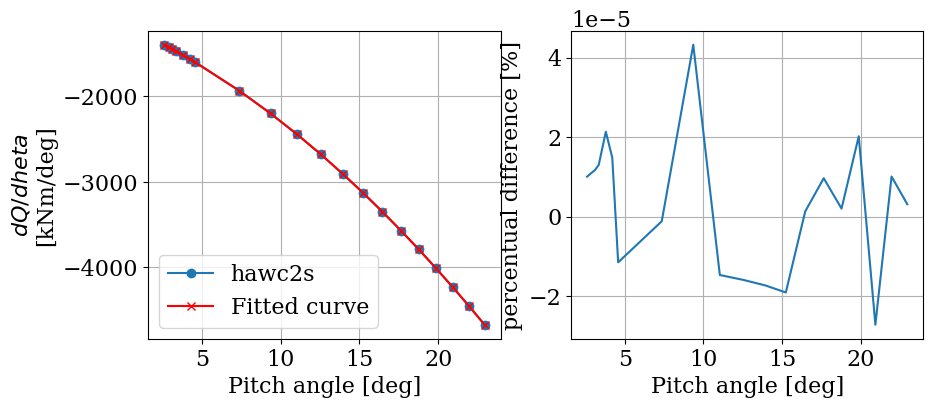

In [7]:
# analyitical derivations

ctrltune_dict = load_ctrl_txt(redesign_ctrl_tuning_path)
hawc2s_data,  fit_redesign= load_ctrl_tuning(redesign_ctrl_tuning_path)
aero_gains_df = ctrltune_dict['aero_gains']

KK1, KK2, dQdtheta_fit = fit_curve_KK(fit_redesign, hawc2s_data)


# Print the fitted parameters
print(f"Fitted K1: {KK1}")
print(f"Fitted K2: {KK2}")

# Plot the original data and the fitted curve
fig1, axs1 = plt.subplots(1, 2, num=1, figsize=(10,4), clear=True) 
axs1[0].plot(fit_redesign['theta'], fit_redesign['fit_theta'], marker='o', label='hawc2s')
axs1[0].plot(fit_redesign['theta'], dQdtheta_fit, label='Fitted curve', marker='x', color='red')
axs1[0].legend()
axs1[0].grid()
axs1[0].set_xlabel('Pitch angle [deg]')
axs1[0].set_ylabel('$dQ/d\theta$\n[kNm/deg]')

axs1[1].plot(fit_redesign['theta'], (fit_redesign['fit_theta'] - dQdtheta_fit)/fit_redesign['fit_theta']*100)
axs1[1].grid()
axs1[1].set_xlabel('Pitch angle [deg]')
axs1[1].set_ylabel('percentual difference [%]')
#plt.savefig('3_1_fit.pdf', format='pdf',bbox_inches='tight')
plt.show()



## PERFORMANCE

In [10]:
# compute rated speed

omega_rpm = OMEGA_MAX
omega_rad = omega_rpm*np.pi/30

omega_min_rpm = 6
omega_min_rad = omega_min_rpm*np.pi/30

print('min_rot_speed', omega_min_rad)
print('rated_rot_speed', omega_rad)


min_rot_speed 0.6283185307179586
rated_rot_speed 0.982543516758902


In [14]:
# txt output

#                  C1   C2   C3   C4   C5   C6    C7   C8   C9   C10  C11  C12  C13
Cdata_fqc_damp = [[0.05,0.01,0.10,0.05,0.01,0.10, 0.08,0.06,0.04,0.04,0.04,0.04,0.04],   # omega
                  [0.7 ,0.7 ,0.7 ,0.7 ,0.7 ,0.7 , 0.7 ,0.7 ,0.7 ,0.9 ,0.8 ,0.6 ,0.5 ],   # zeta
                  [1  , 1  , 1  , 0  , 0  , 0   , 1,   1,   1   ,1   ,1   ,1   ,1   ]]   # const power = 1, const torque = 0

controller_list = ['C1', 'C9', 'C12']

print(f'file name  |  Kp       |  Ki ')
for k in range(len(controller_list)):
    # Filename for each iteration
    path = f'remodel/res_hawc2s/remodel_hawc2s_ctrl_{controller_list[k]}_ctrl_tuning.txt'
    data,  fit= load_ctrl_tuning(path)

    print(f'    {controller_list[k]}    | {data["Kp_pitch"]:8.6f} | {data["Ki_pitch"]*10:8.6f}')


file name  |  Kp       |  Ki 
    C1    | 1.395670 | 2.755560
    C9    | 1.150080 | 1.763560
    C12    | 1.009740 | 1.763560


## HAWC2 on C1 - C6 - C12

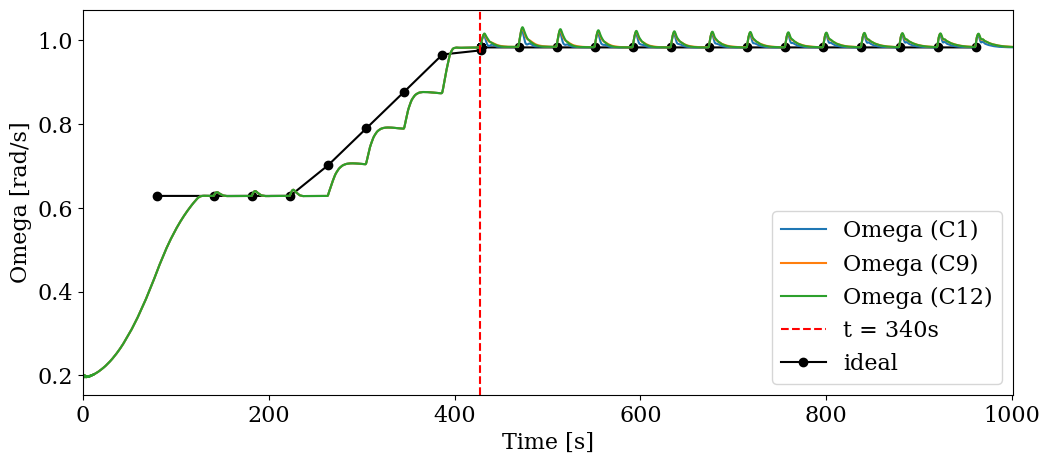

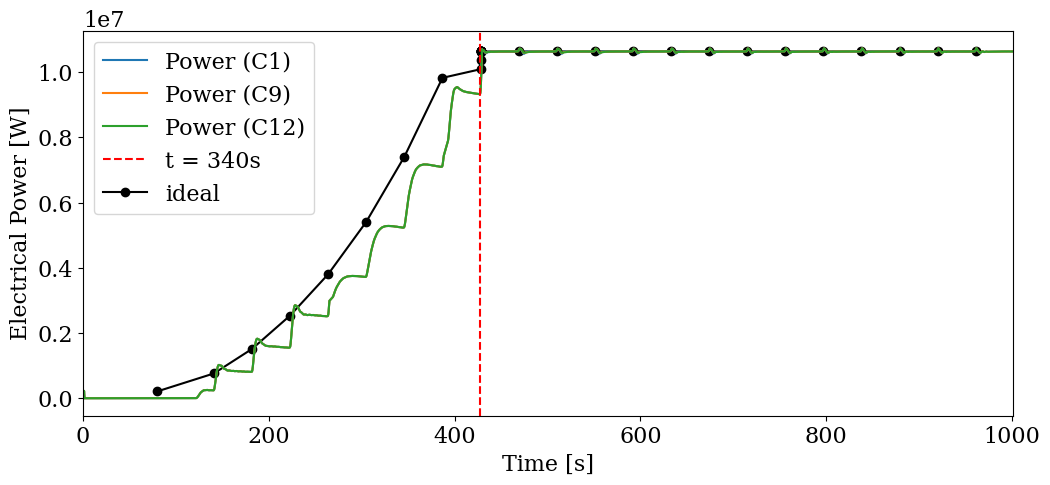

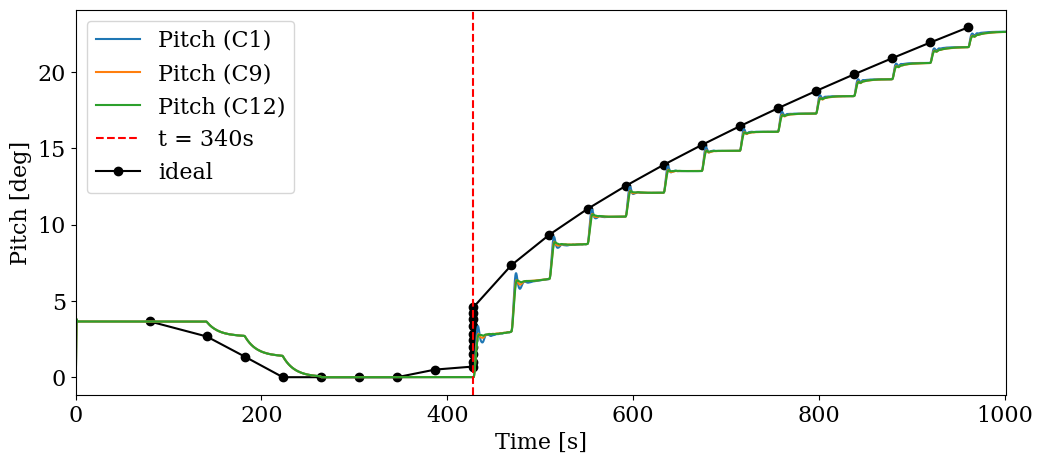

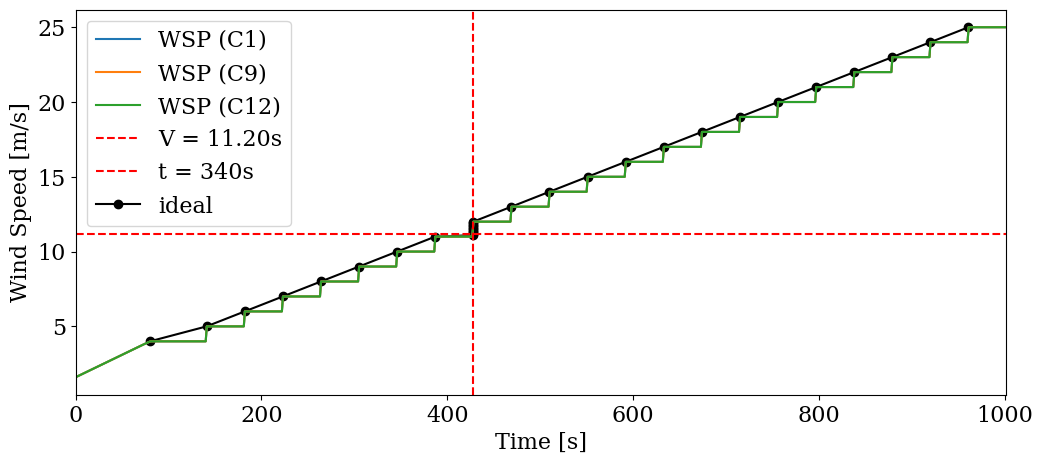

 controller |              omega          |              power
 controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]
    C1      | 102.989       |       7.400 | 100.451      | 41.000
    C9      | 103.249       |       14.550 | 100.469      | 41.000
    C12      | 103.380       |       13.520 | 100.477      | 41.000


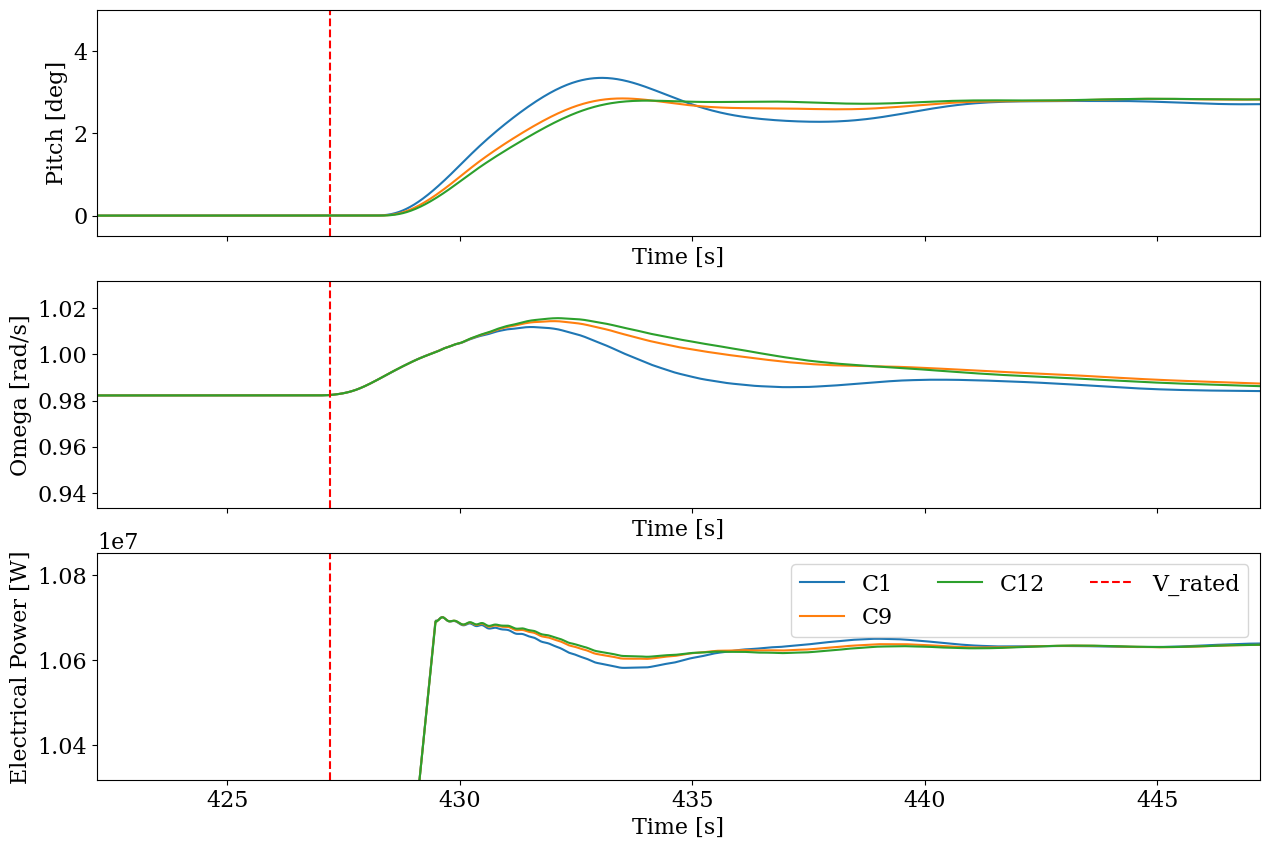

In [27]:
# first plot C1 -- C6


flex_path = 'remodel/data/remodel_flex2.opt'
existing_step_file = 'remodel/res/remodel_hawc2_step_C1.hdf5'
idx_ideal = ideal_curve(flex_path, existing_step_file)
flex_data = load_oper(flex_path)

h2res = ReadHAWC2(existing_step_file)
idx_rated = np.argmin(h2res.data[:,14] < V_RATED_Y)
time_Vrated = h2res.data[idx_rated,0]

# Define the vertical line position
vertical_line_time = time_Vrated
#xmin = 420
#xmax = 470
xmin = 0
xmax = 1001
horizontal_line_wsp = V_RATED_Y

controller_list = ['C1', 'C9', 'C12']

zoom = True


# Create figure and axes for each variable
fig_omega, ax_omega = plt.subplots(figsize=(12, 5))
fig_power, ax_power = plt.subplots(figsize=(12, 5))
fig_pitch, ax_pitch = plt.subplots(figsize=(12, 5))
fig_wsp, ax_wsp = plt.subplots(figsize=(12, 5))

for k in range(len(controller_list)):
    # Filename for each iteration
    fname = f'remodel/res/remodel_hawc2_step_{controller_list[k]}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
    # Plot WSP
    ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP ({controller_list[k]})')
    
    # Plot Pitch
    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]], label=f'Pitch ({controller_list[k]})')
    
    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega], label=f'Omega ({controller_list[k]})')

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'Power ({controller_list[k]})')

# Add vertical line at t = 340s on each plot
ax_wsp.axhline(y=horizontal_line_wsp, color='red', linestyle='--', label=f'V = {V_RATED_Y:.2f}s')
ax_wsp.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='t = 340s')

# add ideal profile
ax_wsp.plot(  h2res.t[idx_ideal], flex_data['ws_ms'],                    marker='o', color='k', zorder=1, label='ideal')
ax_pitch.plot(h2res.t[idx_ideal], flex_data['pitch_deg'],                marker='o', color='k', zorder=1, label='ideal')
ax_omega.plot(h2res.t[idx_ideal], flex_data['rotor_speed_rpm']*np.pi/30, marker='o', color='k', zorder=1, label='ideal')
ax_power.plot(h2res.t[idx_ideal], flex_data['power_kw']*1e3,             marker='o', color='k', zorder=1, label='ideal')


# Set labels and titles for WSP plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('Wind Speed [m/s]')
ax_wsp.set(xlim=[xmin, xmax])
ax_wsp.legend()

# Set labels and titles for Pitch plot
ax_pitch.set_xlabel('Time [s]')
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(xlim=[xmin, xmax])
ax_pitch.legend()

# Set labels and titles for Omega plot
ax_omega.set_xlabel('Time [s]')
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(xlim=[xmin, xmax])
ax_omega.legend()

# Set labels and titles for Power plot
ax_power.set_xlabel('Time [s]')
ax_power.set_ylabel('Electrical Power [W]')
ax_power.set(xlim=[xmin, xmax])
ax_power.legend()

# Save each figure to a file
#fig_omega.savefig('omega_plot_123.pdf')  # Save Omega plot
#fig_power.savefig('power_plot_123.pdf')  # Save Power plot
#fig_wsp.savefig('wsp_plot_123.pdf')      # Save WSP plot
#fig_pitch.savefig('pitch_plot_123.png')  # Save Pitch plot

# Show all plots
plt.show()



if zoom:

    xmin = time_Vrated - 5
    xmax = time_Vrated + 20

    #fig_omega, ax_omega = plt.subplots(figsize=(12, 5))
    #fig_power, ax_power = plt.subplots(figsize=(12, 5))
    #fig_pitch, ax_pitch = plt.subplots(figsize=(12, 5))
    fig, (ax_pitch, ax_omega, ax_power) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)


    print(' controller |              omega          |              power')
    print(' controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]')
    #          C1      | 102.984       | 7.390       | 100.451      | 4.710

    for k in range(len(controller_list)):
        # Filename for each iteration
        fname = f'remodel/res/remodel_hawc2_step_{controller_list[k]}.hdf5'
        h2res = ReadHAWC2(fname)
        
        # Retrieve channel information
        names, units, desc = h2res.chaninfo

        # Extract indices for time, WSP, Omega, pitch, and power
        idx_Time = np.where(['Time [s]' in name for name in names])[0]
        idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
        idx_Omega = np.where(['Omega' in name for name in names])[0]
        idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
        idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]

        # Plot Pitch
        ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]])
        #overshoot_pitch, settling_idx_pitch = compute_overshoot_settling(h2res.data[:, idx_pitch[0]], idx_rated+300, OMEGA_MAX*np.pi/30)

        
        # Plot Omega
        ax_omega.plot(h2res.t, h2res.data[:, idx_Omega])
        overshoot_omega, settling_idx_omega = compute_overshoot_settling(h2res.data[:, idx_Omega], idx_rated+300,OMEGA_MAX*np.pi/30)

        # Plot Power
        ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'{controller_list[k]}')
        overshoot_power, settling_idx_power = compute_overshoot_settling(h2res.data[:, idx_power], idx_rated+300, POWER_MAX, tolerance=0.01)

        print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')


    ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--')
    ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--')
    ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='V_rated')

    #ax_pitch.plot(h2res.t[idx_ideal], flex_data['pitch_deg'],                marker='o', color='k', zorder=1, label='ideal')
    #ax_omega.plot(h2res.t[idx_ideal], flex_data['rotor_speed_rpm']*np.pi/30, marker='o', color='k', zorder=1, label='ideal')
    #ax_power.plot(h2res.t[idx_ideal], flex_data['power_kw']*1e3,             marker='o', color='k', zorder=1, label='ideal')

    # only for 1 or 2 curves
    #time1 = h2res.t[settling_idx_omega]
    #time2 = h2res.t[settling_idx_power]
    #time_last = time1+2000
    #ax_omega.plot([time1, time_last], [OMEGA_MAX*np.pi/30*1.01,OMEGA_MAX*np.pi/30*1.01], linestyle='--', color='k')
    #ax_omega.plot([time1, time_last], [OMEGA_MAX*np.pi/30*0.99,OMEGA_MAX*np.pi/30*0.99], linestyle='--', color='k')
    #ax_power.plot([time1, time_last], [POWER_MAX*1.001,POWER_MAX*1.001], linestyle='--', color='k')
    #ax_power.plot([time1, time_last], [POWER_MAX*0.999,POWER_MAX*0.999], linestyle='--', color='k')

    # Set labels and titles for Pitch plot
    ax_pitch.set_xlabel('Time [s]')
    ax_pitch.set_ylabel('Pitch [deg]')
    ax_pitch.set(ylim=[-0.5, 5])
    ax_pitch.set(xlim=[xmin, xmax])
    #ax_pitch.legend(ncol=3)

    # Set labels and titles for Omega plot
    ax_omega.set_xlabel('Time [s]')
    ax_omega.set_ylabel('Omega [rad/s]')
    ax_omega.set(ylim=[OMEGA_MAX*np.pi/30*0.95, OMEGA_MAX*np.pi/30*1.05])
    ax_omega.set(xlim=[xmin, xmax])
    #ax_omega.legend(ncol=3)

    # Set labels and titles for Power plot
    ax_power.set_xlabel('Time [s]')
    ax_power.set_ylabel('Electrical Power [W]')
    ax_power.set(ylim=[POWER_MAX*0.97, POWER_MAX*1.02])
    ax_power.set(xlim=[xmin, xmax])
    ax_power.legend(ncol=3)

    # Save each figure to a file
    #fig_omega.savefig('omega_plot_123.pdf')  # Save Omega plot
    #fig_power.savefig('power_plot_123.pdf')  # Save Power plot
    #fig_wsp.savefig('wsp_plot_123.pdf')      # Save WSP plot
    #fig_pitch.savefig('pitch_plot_123.png')  # Save Pitch plot

    # Show all plots
    plt.show()



    C12      | 103.516       |       13.070 | 100.485      | 41.000
    C1      | 103.516       |       13.070 | 100.485      | 41.000


C:\Users\nicol\AppData\Local\Temp\ipykernel_20820\3793937536.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_omega.legend(ncol=3)


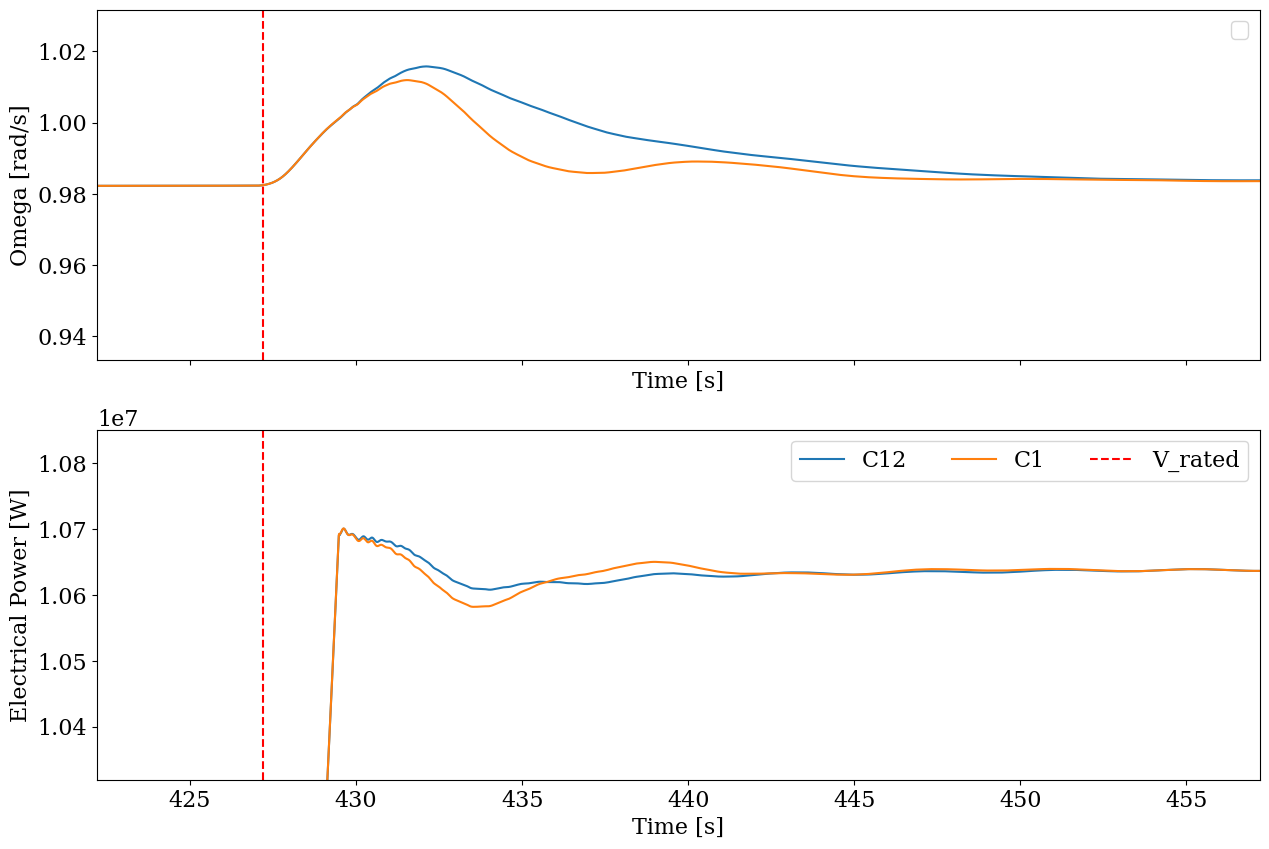

In [13]:
controller_list = ['C12', 'C1']


xmin = time_Vrated - 5
xmax = time_Vrated + 30


fig, (ax_omega, ax_power) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)


for k in range(len(controller_list)):
    # Filename for each iteration
    fname = f'remodel/res/remodel_hawc2_step_{controller_list[k]}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]

    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega])
    #overshoot_omega, settling_idx_omega = compute_overshoot_settling(h2res.data[:, idx_Omega], idx_rated+300,OMEGA_MAX*np.pi/30)


    time = h2res.t[settling_idx_omega]
    time_last = time+20

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power], label=f'{controller_list[k]}')
    
    tolerance = 0.001
    #overshoot_power, settling_idx_power = compute_overshoot_settling(h2res.data[:, idx_power], idx_rated +100 ,POWER_MAX, tolerance=tolerance)
    
    time = h2res.t[settling_idx_power]
    time_last = time+20
    
    print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')


ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--', label='V_rated')

# Set labels and titles for Omega plot
ax_omega.set_xlabel('Time [s]')
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(ylim=[OMEGA_MAX*np.pi/30*0.95, OMEGA_MAX*np.pi/30*1.05])
ax_omega.set(xlim=[xmin, xmax])
ax_omega.legend(ncol=3)

# Set labels and titles for Power plot
ax_power.set_xlabel('Time [s]')
ax_power.set_ylabel('Electrical Power [W]')
ax_power.set(ylim=[POWER_MAX*0.97, POWER_MAX*1.02])
ax_power.set(xlim=[xmin, xmax])
ax_power.legend(ncol=3)


plt.show()



 controller |              omega          |              power
 controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]
    C1_small      | 102.787       |       12.560 | 100.537      | 39.000
    C1_large      | 102.508       |       11.680 | 100.463      | 39.000
    C9      | 103.249       |       14.550 | 100.587      | 10.560
    C12_small      | 103.107       |       12.200 | 100.533      | 23.480
    C12_large      | 102.671       |       10.230 | 100.455      | 39.000


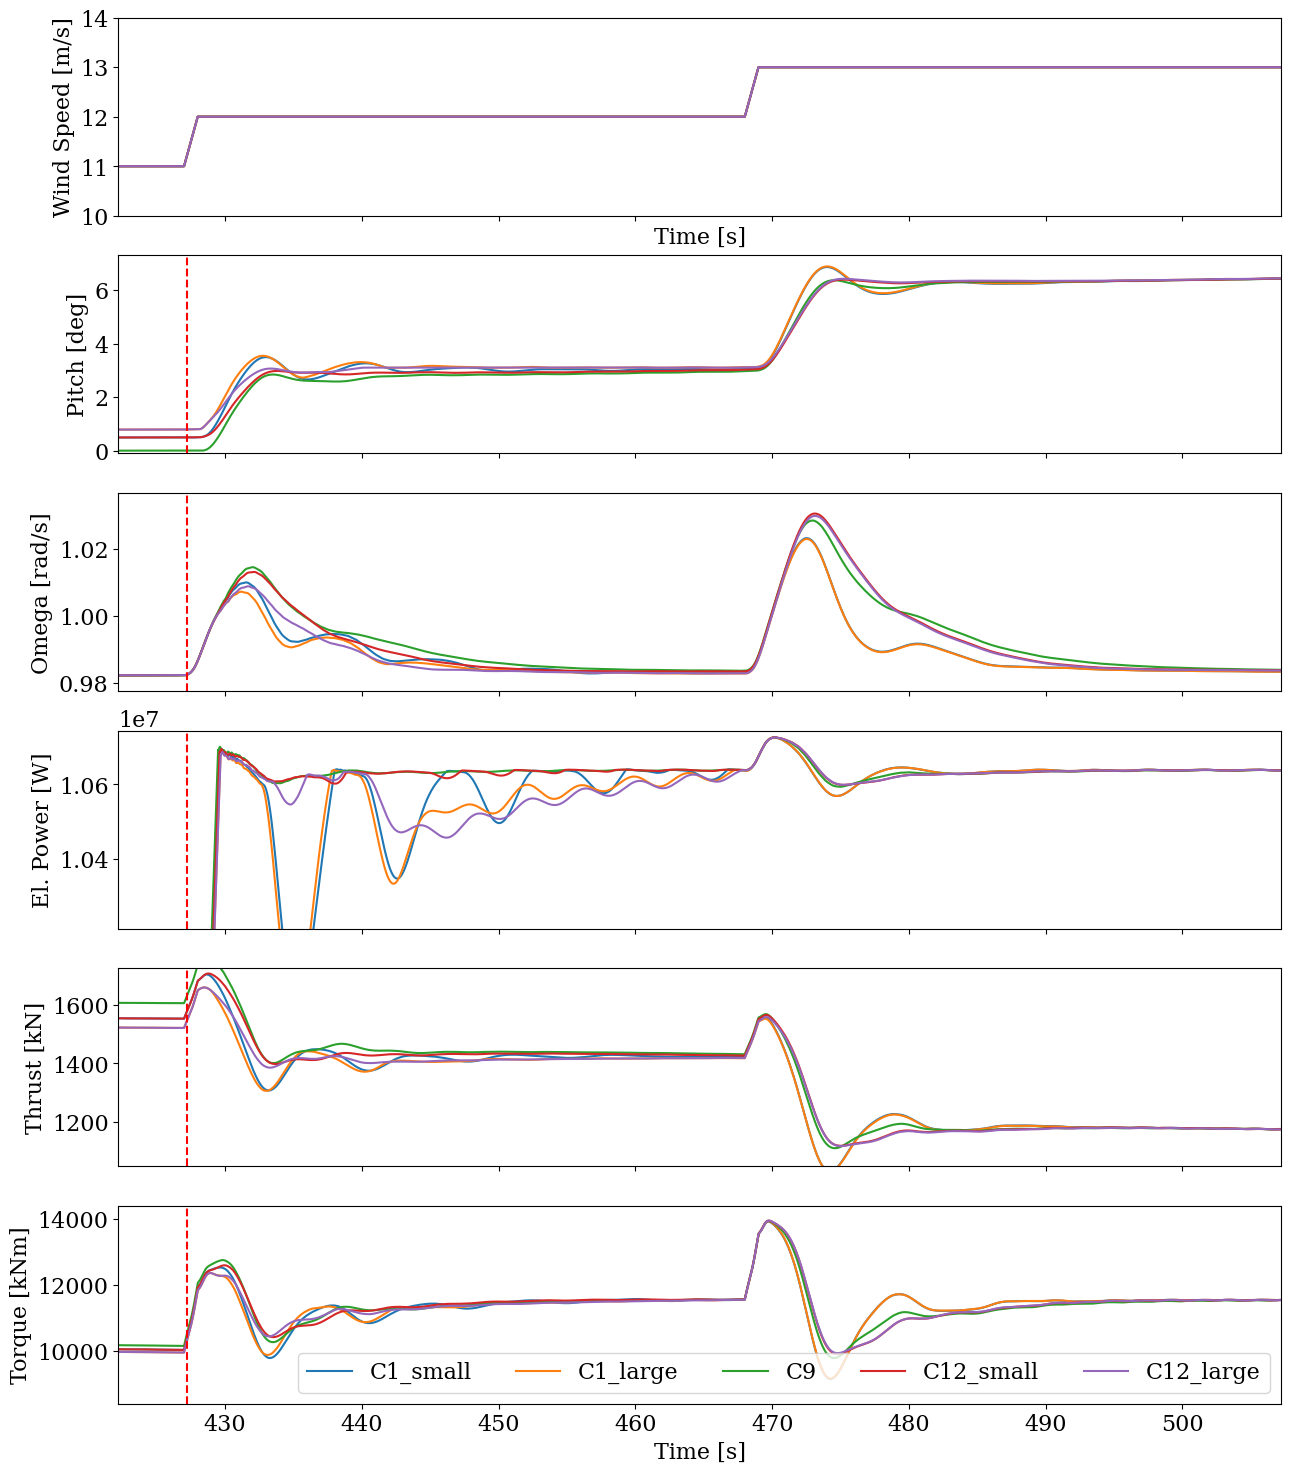

In [42]:
# add other stuff

controller_list = ['C1_small', 'C1_large', 'C9', 'C12_small', 'C12_large']


xmin = time_Vrated - 5
xmax = time_Vrated + 30


def compute_overshoot_settling1(array, idx_start, mean, tolerance=0.01):

    def check_bigger(array, number):
        return array > number
    def check_smaller(array, number):
        return array < number
    
    idx_lim = idx_start + 3800
    array_reduced = array[idx_start:idx_lim]
    overshoot = np.max(abs(array_reduced))/mean*100
    
    ratio = array_reduced / mean
    more = check_smaller(ratio, 1+tolerance)
    less = check_bigger(ratio, 1-tolerance)
    combined = more & less
    reversed_idx = np.argmax(combined[::-1] == False)
    settling_idx =  len(ratio) - reversed_idx

    settling_idx += idx_start

    return overshoot, settling_idx


fig, (ax_wsp, ax_pitch, ax_omega, ax_power, ax_thrust, ax_torque) = plt.subplots(6, 1, figsize=(15, 18), sharex=True)


print(' controller |              omega          |              power')
print(' controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]')
#          C1      | 102.984       | 7.390       | 100.451      | 4.710

for k in range(len(controller_list)):
    # Filename for each iteration
    fname = f'remodel/res/remodel_hawc2_step_{controller_list[k]}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
    idx_thrust = np.where(['Ae rot. thrust' in name for name in names])[0]
    idx_torque = np.where(['Ae rot. torque' in name for name in names])[0]

    # Plot WSP
    ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP], label=f'WSP ({controller_list[k]})')
    

    # Plot Pitch
    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]])
    
    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega])

    overshoot_omega, settling_idx_omega = compute_overshoot_settling1(h2res.data[:, idx_Omega], idx_rated+300,OMEGA_MAX*np.pi/30)
    time = h2res.t[settling_idx_omega]
    time_last = time+20

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power])
    
    tolerance = 0.001
    overshoot_power, settling_idx_power = compute_overshoot_settling1(h2res.data[:, idx_power], idx_rated +100 ,POWER_MAX, tolerance=tolerance)
    time = h2res.t[settling_idx_power]
    time_last = time+20
    
    #print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')

    # plot thrust
    ax_thrust.plot(h2res.t, h2res.data[:, idx_thrust])
    

    # plot torque
    ax_torque.plot(h2res.t, h2res.data[:, idx_torque], label=f'{controller_list[k]}')



    # overshoot and settling
    print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')



ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_thrust.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_torque.axvline(x=vertical_line_time, color='red', linestyle='--')

# wind plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('Wind Speed [m/s]')
ax_wsp.set(xlim=[xmin, xmax])
ax_wsp.set(ylim=[10,14])

# pitch plot
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(ylim=[-0.1, 7.3])
ax_pitch.set(xlim=[xmin, xmax])


# omega plot
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(ylim=[OMEGA_MAX*np.pi/30*0.995, OMEGA_MAX*np.pi/30*1.055])
ax_omega.set(xlim=[xmin, xmax])
#ax_omega.legend(ncol=3)

# power plot
ax_power.set_ylabel('El. Power [W]')
ax_power.set(ylim=[POWER_MAX*0.96, POWER_MAX*1.01])
ax_power.set(xlim=[xmin, xmax])

# thrust plot
ax_thrust.set_ylabel('Thrust [kN]')
ax_thrust.set(ylim=[1500*0.7, 1500*1.15])
ax_thrust.set(xlim=[xmin, xmax])
#ax_thrust.set(xlim=[0, 1001])
#ax_thrust.legend(ncol=3)

# torque plot
ax_torque.set_xlabel('Time [s]')
ax_torque.set_ylabel('Torque [kNm]')
ax_torque.set(ylim=[12000*0.7, 12000*1.2])
ax_torque.set(xlim=[xmin, xmax+50])
ax_torque.legend(ncol=5)
#ax_torque.set(xlim=[0, 1001])
#ax_torque.legend(ncol=3)

plt.savefig('plots/ctr_performance_zoom.pdf', format='pdf',bbox_inches='tight')
plt.show()



 controller |              omega          |              power
 controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]
    C1_small      | 102.787       |       12.560 | 100.537      | 39.000
    C1_large      | 102.508       |       11.680 | 100.463      | 39.000
    C9      | 103.249       |       14.550 | 100.587      | 10.560
    C12_small      | 103.107       |       12.200 | 100.533      | 23.480
    C12_large      | 102.671       |       10.230 | 100.455      | 39.000


C:\Users\nicol\AppData\Local\Temp\ipykernel_2804\396977092.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_omega.legend(ncol=5)


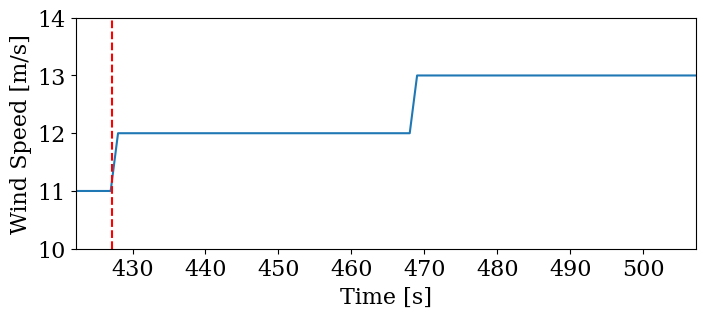

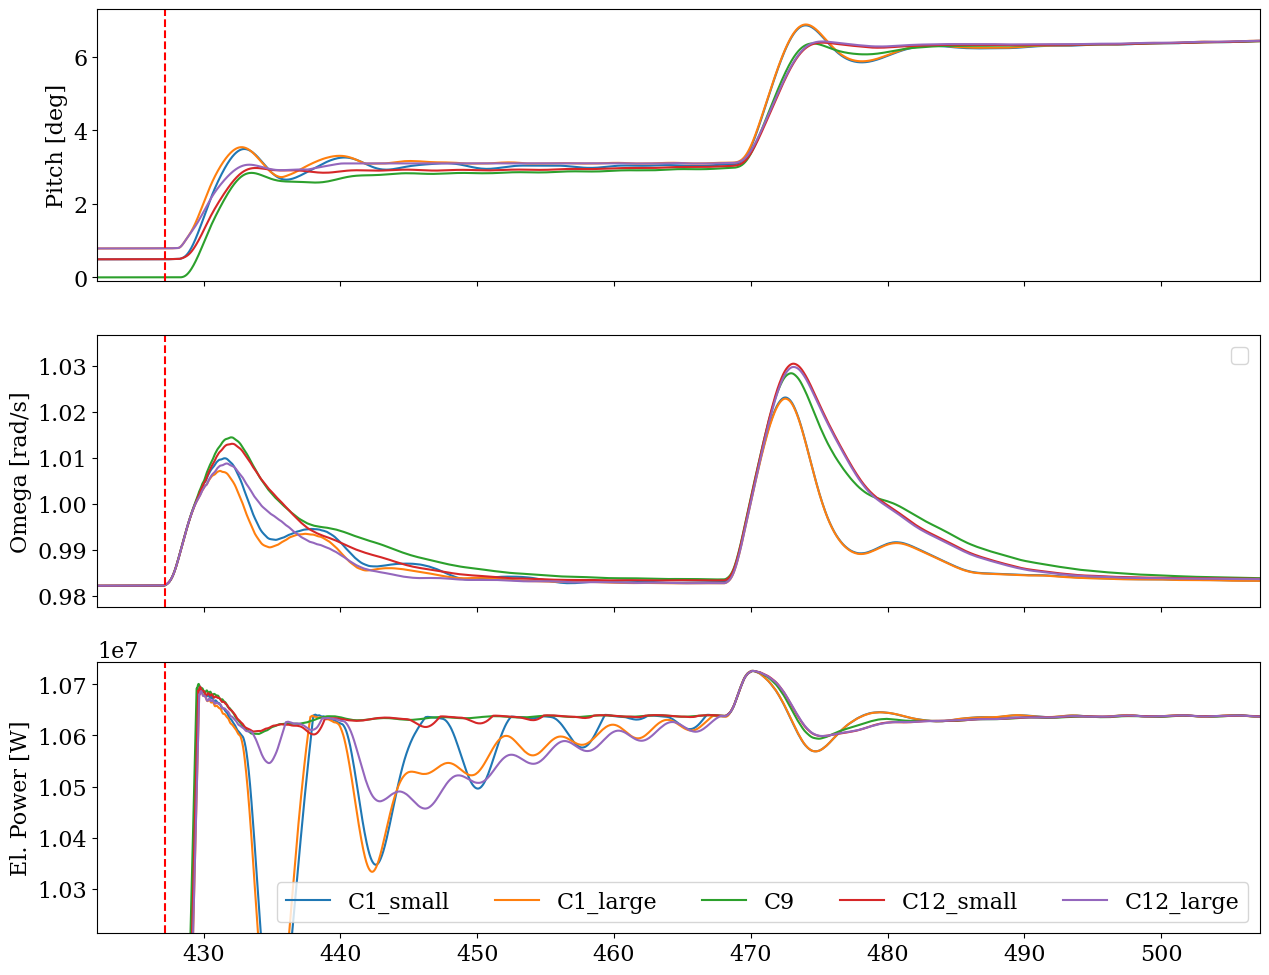

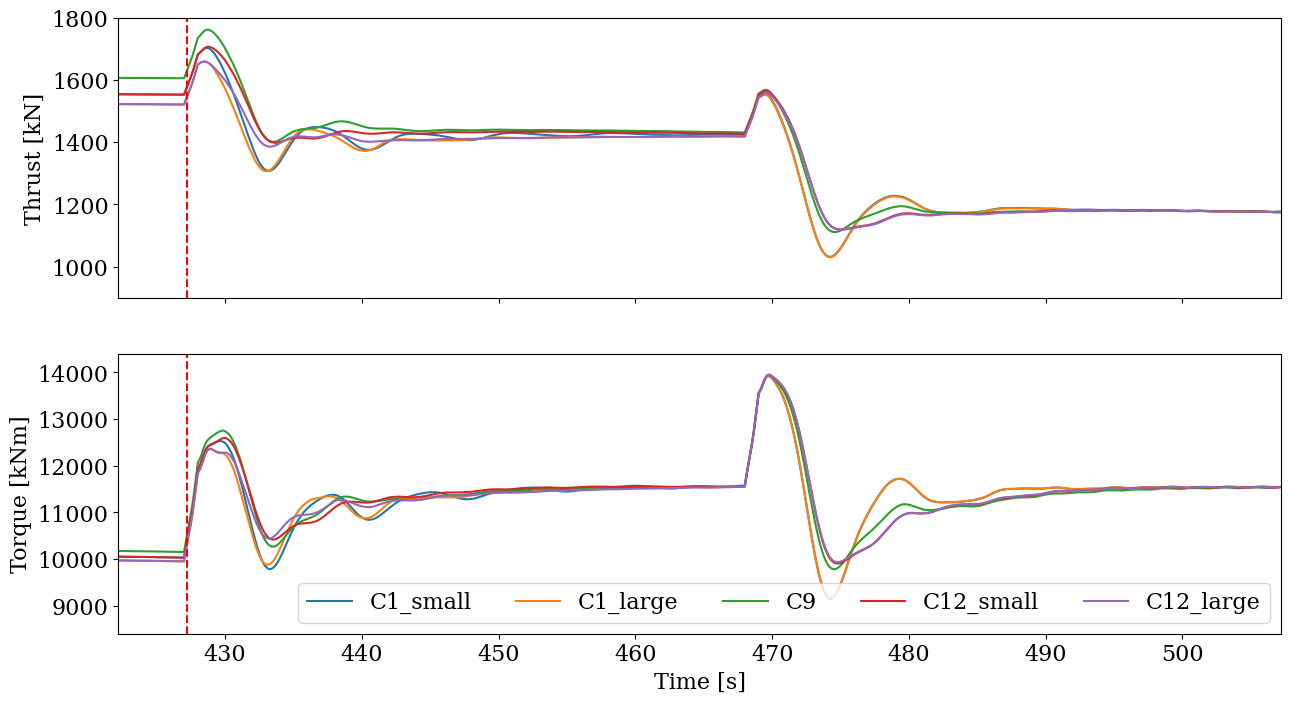

In [52]:
# final

controller_list = ['C1_small', 'C1_large', 'C9', 'C12_small', 'C12_large']


xmin = time_Vrated - 5
xmax = time_Vrated + 30


def compute_overshoot_settling1(array, idx_start, mean, tolerance=0.01):

    def check_bigger(array, number):
        return array > number
    def check_smaller(array, number):
        return array < number
    
    idx_lim = idx_start + 3800
    array_reduced = array[idx_start:idx_lim]
    overshoot = np.max(abs(array_reduced))/mean*100
    
    ratio = array_reduced / mean
    more = check_smaller(ratio, 1+tolerance)
    less = check_bigger(ratio, 1-tolerance)
    combined = more & less
    reversed_idx = np.argmax(combined[::-1] == False)
    settling_idx =  len(ratio) - reversed_idx

    settling_idx += idx_start

    return overshoot, settling_idx


fig, (ax_wsp) = plt.subplots(1, 1, figsize=(8, 3), sharex=True)
fig1, (ax_pitch, ax_omega, ax_power) = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig2, (ax_thrust, ax_torque) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)



print(' controller |              omega          |              power')
print(' controller | overshoot [%] | settling [s]| overshoot [%] | settling [s]')
#          C1      | 102.984       | 7.390       | 100.451      | 4.710

for k in range(len(controller_list)):
    # Filename for each iteration
    fname = f'remodel/res/remodel_hawc2_step_{controller_list[k]}.hdf5'
    h2res = ReadHAWC2(fname)
    
    # Retrieve channel information
    names, units, desc = h2res.chaninfo

    # Extract indices for time, WSP, Omega, pitch, and power
    idx_Time = np.where(['Time [s]' in name for name in names])[0]
    idx_WSP = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    idx_Omega = np.where(['Omega' in name for name in names])[0]
    idx_pitch = np.where(['bea2 angle' in name for name in names])[0]
    idx_power = np.where(['DLL inp   2:   2' in name for name in names])[0]
    idx_thrust = np.where(['Ae rot. thrust' in name for name in names])[0]
    idx_torque = np.where(['Ae rot. torque' in name for name in names])[0]

    # Plot WSP
    if k == 1:
        ax_wsp.plot(h2res.t, h2res.data[:, idx_WSP])
    

    # Plot Pitch
    ax_pitch.plot(h2res.t, h2res.data[:, idx_pitch[0]])
    
    # Plot Omega
    ax_omega.plot(h2res.t, h2res.data[:, idx_Omega])

    overshoot_omega, settling_idx_omega = compute_overshoot_settling1(h2res.data[:, idx_Omega], idx_rated+300,OMEGA_MAX*np.pi/30)
    time = h2res.t[settling_idx_omega]
    time_last = time+20

    # Plot Power
    ax_power.plot(h2res.t, h2res.data[:, idx_power],  label=f'{controller_list[k]}')
    
    tolerance = 0.001
    overshoot_power, settling_idx_power = compute_overshoot_settling1(h2res.data[:, idx_power], idx_rated +100 ,POWER_MAX, tolerance=tolerance)
    time = h2res.t[settling_idx_power]
    time_last = time+20
    
    #print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')

    # plot thrust
    ax_thrust.plot(h2res.t, h2res.data[:, idx_thrust])
    

    # plot torque
    ax_torque.plot(h2res.t, h2res.data[:, idx_torque], label=f'{controller_list[k]}')



    # overshoot and settling
    print(f'    {controller_list[k]}      | {overshoot_omega:5.3f}       |       {h2res.t[settling_idx_omega]-time_Vrated:5.3f} | {overshoot_power:5.3f}      | {h2res.t[settling_idx_power]-time_Vrated:5.3f}')


ax_wsp.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_pitch.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_omega.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_power.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_thrust.axvline(x=vertical_line_time, color='red', linestyle='--')
ax_torque.axvline(x=vertical_line_time, color='red', linestyle='--')

# wind plot
ax_wsp.set_xlabel('Time [s]')
ax_wsp.set_ylabel('Wind Speed [m/s]')
ax_wsp.set(xlim=[xmin, xmax+50])
ax_wsp.set(ylim=[10,14])

# pitch plot
ax_pitch.set_ylabel('Pitch [deg]')
ax_pitch.set(ylim=[-0.1, 7.3])
ax_pitch.set(xlim=[xmin, xmax])


# omega plot
ax_omega.set_ylabel('Omega [rad/s]')
ax_omega.set(ylim=[OMEGA_MAX*np.pi/30*0.995, OMEGA_MAX*np.pi/30*1.055])
ax_omega.set(xlim=[xmin, xmax])
ax_omega.legend(ncol=5)
#ax_omega.legend(ncol=3)

# power plot
ax_power.set_ylabel('El. Power [W]')
ax_power.set(ylim=[POWER_MAX*0.96, POWER_MAX*1.01])
ax_power.set(xlim=[xmin, xmax+50])
ax_power.legend(ncol=5)

# thrust plot
ax_thrust.set_ylabel('Thrust [kN]')
ax_thrust.set(ylim=[1500*0.6, 1500*1.2])
ax_thrust.set(xlim=[xmin, xmax])
#ax_thrust.set(xlim=[0, 1001])
#ax_thrust.legend(ncol=3)

# torque plot
ax_torque.set_xlabel('Time [s]')
ax_torque.set_ylabel('Torque [kNm]')
ax_torque.set(ylim=[12000*0.7, 12000*1.2])
ax_torque.set(xlim=[xmin, xmax+50])
ax_torque.legend(ncol=5)
#ax_torque.set(xlim=[0, 1001])
#ax_torque.legend(ncol=3)


fig.savefig('plots/ctr_wind.pdf', format='pdf',bbox_inches='tight')
fig1.savefig('plots/ctr_performance_1.pdf', format='pdf',bbox_inches='tight')
fig2.savefig('plots/ctr_performance_2.pdf', format='pdf',bbox_inches='tight')
plt.show()

